In [2]:
import matplotlib as mpl

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

from random import uniform
from decision_tree import DecisionTree


In [3]:
def label(f1,f2):
    if f1 <= 50 and f2 <= 50: return 1
    if f1 <= 50 and f2 > 50 : return 0
    if f1 > 50 and f2 <= 50: return 0
    if f1 > 50 and f2 > 50: return 1


def get_dataset():
    points = [
        (uniform(0,100),uniform(0,100))
        for _ in range(220)
    ]
    labeled_points = [
        [f1,f2,label(f1, f2)]
        for f1,f2 in points
    ]
    return pd.DataFrame(
        data=labeled_points,
        columns=['f1','f2','target'],
        dtype=np.float64,
    )

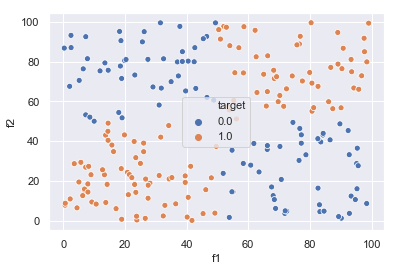

In [9]:
df = get_dataset()
ax = sns.scatterplot(x="f1",y="f2", data=df, hue='target')

In [10]:
dt = DecisionTree()

In [13]:
print(df.iloc[3])

f1        58.602021
f2        97.542900
target     1.000000
Name: 3, dtype: float64
